В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

# Задание 1 

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

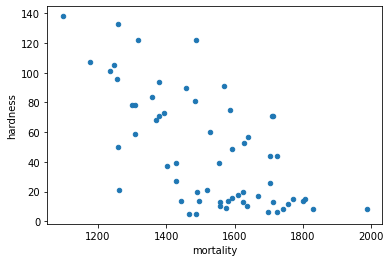

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('water.csv')

#Построить точечный график
df.plot(kind='scatter', x='mortality', y='hardness')

In [5]:
#Рассчитать коэффициенты корреляции Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
#Рассчитать коэффициенты корреляции Пирсона
df[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Вывод: Корреляция отрицательная, это значит что при увеличении жёсткости, снижается смертность. Скорее всего мягкость воды приводит к недостатоку микроэлементов и минералов в организме и в долгосрочной перспективе к смерти.

In [67]:
#Построить модель линейной регрессии

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df[['mortality']]
y = df['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

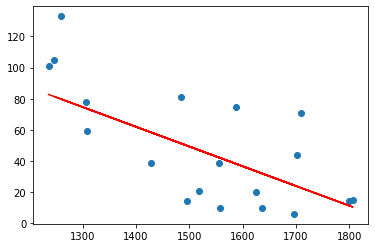

In [70]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [71]:
#Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.4948982822876836

In [63]:
#Вывести график остатков
К сожалению не поняла как выводить график остатков

# Задание 2

In [ ]:
#Разделить данные на 2 группы
#Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [29]:
df_s = df[df.location == 'South']
df_n = df[df.location == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

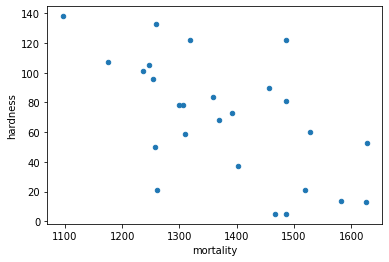

In [14]:
#Построить точечный график South
df_s.plot(kind='scatter', x='mortality', y='hardness')

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

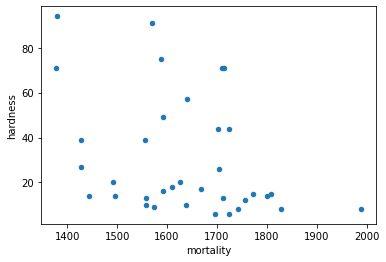

In [15]:
#Построить точечный график North
df_n.plot(kind='scatter', x='mortality', y='hardness')

In [16]:
#Рассчитать коэффициенты корреляции Спирмена South
df_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [17]:
#Рассчитать коэффициенты корреляции Спирмена North
df_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [18]:
#Рассчитать коэффициенты корреляции Пирсона South
df_s[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [19]:
#Рассчитать коэффициенты корреляции Пирсона North
df_n[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


Вывод: Корреляция у Южных городов более сильная, но кажется это из-за того, что в данных на юге жесткость воды начинается с показателя 140, а на севере с 90. Нужно дополнительно проверить

In [32]:
#Рассчитать коэффициенты корреляции Пирсона South
df_n['hardness'].max() #94
df_s=df_s[df_s.hardness < 95]
df_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.00000,-0.35969
hardness,-0.35969,1.00000


Вывод: Если берем +- одинаковый набор данных, то различия в корреляции между югом и севером почти нет.

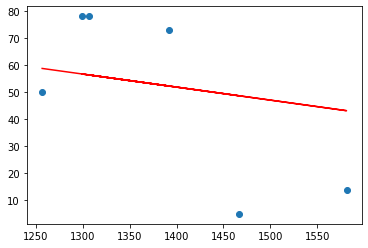

In [135]:
#Построить модель линейной регрессии South
Xs = df_s[['mortality']]
ys = df_s['hardness']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=42)
Xs_train.shape
ys_train.shape
models = LinearRegression()
models.fit(Xs_train, ys_train)
ys_pred = models.predict(Xs_test)
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')

In [136]:
#Рассчитать коэффициент детерминации South
models.score(Xs_test, ys_test)

0.2273424308737818

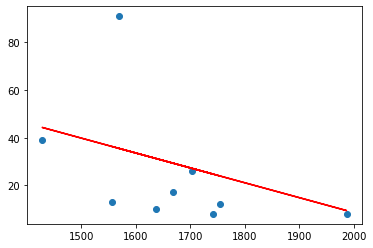

In [133]:
#Построить модель линейной регрессии North
Xn = df_n[['mortality']]
yn = df_n['hardness']
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.25, random_state=38)
Xn_train.shape
yn_train.shape
modeln = LinearRegression()
modeln.fit(Xn_train, yn_train)
yn_pred = modeln.predict(Xn_test)
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')

In [134]:
#Рассчитать коэффициент детерминации North
modeln.score(Xn_test, yn_test)

0.1842600709692056